In [ ]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 501 kB 5.0 MB/s 
     |████████████████████████████████| 79.9 MB 1.1 MB/s 
     |████████████████████████████████| 15.9 MB 70.0 MB/s 
     |████████████████████████████████| 280 kB 81.2 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 147 kB 83.5 MB/s 
     |████████████████████████████████| 1.9 MB 62.2 MB/s 
     |████████████████████████████████| 9.4 MB 77.5 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 106 kB 108.7 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 2.0 MB 70.7 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |██████████████████████

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 137 kB/s
     |████████████████████████████████| 102 kB 5.1 MB/s 
     |████████████████████████████████| 679 kB 70.2 MB/s 
     |████████████████████████████████| 4.7 MB 77.4 MB/s 
     |████████████████████████████████| 296 kB 95.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=a94e8939bddbf4bda0d379d22400cea99316513c85358062fbb2e6b4f73bc904
  Stored in directory: /tmp/pip-ephem-wheel-cache-qmhz6gla/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f8e4f46801e4ce6462136065a1d24f13b73aa143430596fc633e81ea922921db
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
Failed to build pandas-profiling
  Attempting uninstall: typ

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 108MB/s]


In [ ]:
! unzip /content/spaceship-titanic.zip

Archive:  /content/spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tp
from keras import layers
from keras import Model


In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
from helper_functions import *
from plotingfun import *

In [ ]:
train_data=pd.read_csv("/content/train.csv")

In [ ]:
test_data=pd.read_csv("/content/test.csv")

In [ ]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
profile = ProfileReport(train_data, title="Lost in Space", html={"style":{"full_width":True}})

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
def preprocess(data):
  data["Cabin_Deck"]=data["Cabin"].str.extract(r"^([A-Za-z]+)/")
  #data["Cabin_Number"]=data["Cabin"].str.extract(r"/([0-9]+)/")
  data["Cabin_Side"]=data["Cabin"].str.extract(r"/([A-Za-z]+)$")
  data[['VIP']] = train_data[['VIP']].fillna('False')
  data['HomePlanet'].fillna('Mising', inplace=True)
  data['Destination'].fillna('Mising', inplace=True)
  data['Age'].fillna(data['Age'].mean(), inplace=True)
  data['RoomService'].fillna(0, inplace=True)
  data['FoodCourt'].fillna(0, inplace=True)
  data['ShoppingMall'].fillna(0, inplace=True)
  data['Spa'].fillna(0, inplace=True)
  data['VRDeck'].fillna(0, inplace=True)
  data.drop(['Name'],axis=1,inplace=True)
  data.drop(['PassengerId'],axis=1,inplace=True)
  data.drop(['Cabin'],axis=1,inplace=True)
  data.dropna(inplace=True)


def preprocess2(data):
  data["Cabin_Deck"]=data["Cabin"].str.extract(r"^([A-Za-z]+)/")
  #data["Cabin_Number"]=data["Cabin"].str.extract(r"/([0-9]+)/")
  data["Cabin_Side"]=data["Cabin"].str.extract(r"/([A-Za-z]+)$")
  data[['VIP']] = train_data[['VIP']].fillna('False')
  data['HomePlanet'].fillna('Mising', inplace=True)
  data['Destination'].fillna('Mising', inplace=True)
  data['Age'].fillna(np.round(data['Age'].mean()), inplace=True)
  data['RoomService'].fillna(0, inplace=True)
  data['FoodCourt'].fillna(0, inplace=True)
  data['ShoppingMall'].fillna(0, inplace=True)
  data['Spa'].fillna(0, inplace=True)
  data['VRDeck'].fillna(0, inplace=True)
  data.drop(['Name'],axis=1,inplace=True)
  data.drop(['PassengerId'],axis=1,inplace=True)
  data.drop(['Cabin'],axis=1,inplace=True)
  #data.dropna(inplace=True)


In [ ]:
subbmision_test=test_data.copy()

In [ ]:
X=train_data.copy()

In [ ]:
preprocess(X)

In [ ]:
preprocess2(subbmision_test)

In [ ]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


In [ ]:
subbmision_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN
4274,Mars,True,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,D,P
4275,Europa,False,Mising,29.0,True,0.0,2680.0,0.0,0.0,523.0,D,P


In [ ]:
subbmision_test=pd.get_dummies(subbmision_test)


In [ ]:
X=pd.get_dummies(X)

In [ ]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
subbmision_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Mising,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4273,42.0,0.0,847.0,17.0,10.0,144.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4274,29.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4275,29.0,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y=X['Transported']

X=X.drop('Transported',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
train_data_D=tf.data.Dataset.from_tensor_slices(X_train)
train_label_D=tf.data.Dataset.from_tensor_slices(y_train)
test_data_D=tf.data.Dataset.from_tensor_slices(X_test)
test_label_D=tf.data.Dataset.from_tensor_slices(y_test)



In [ ]:
training_data = tf.data.Dataset.zip((train_data_D, train_label_D)).batch(400).prefetch(tf.data.AUTOTUNE )
testing_data = tf.data.Dataset.zip((test_data_D, test_label_D)).batch(400).prefetch(tf.data.AUTOTUNE )

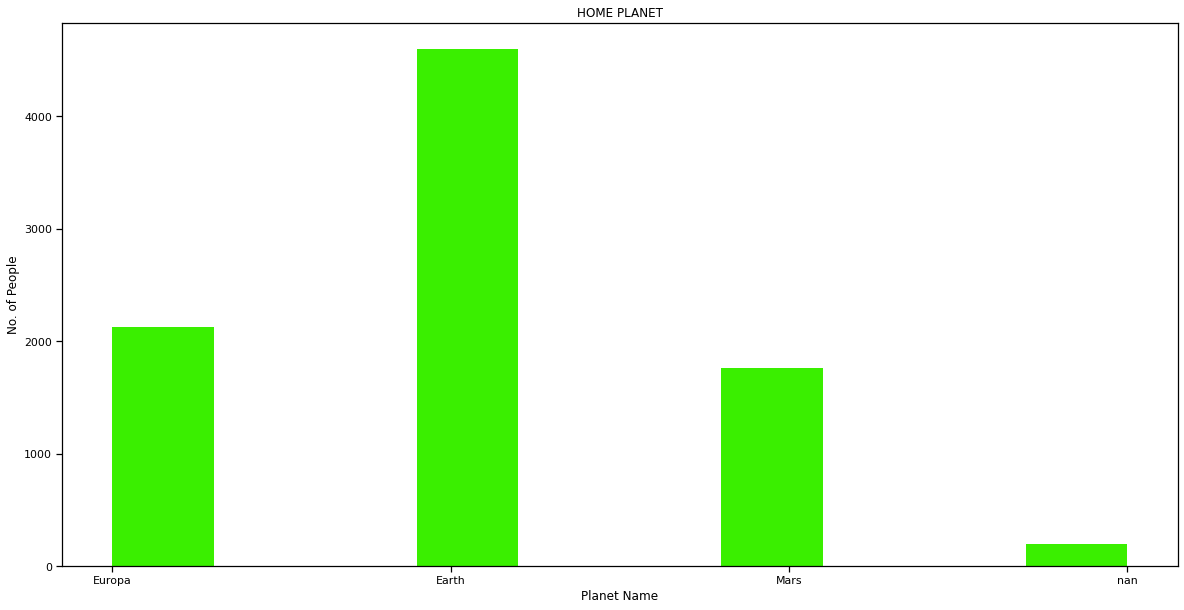

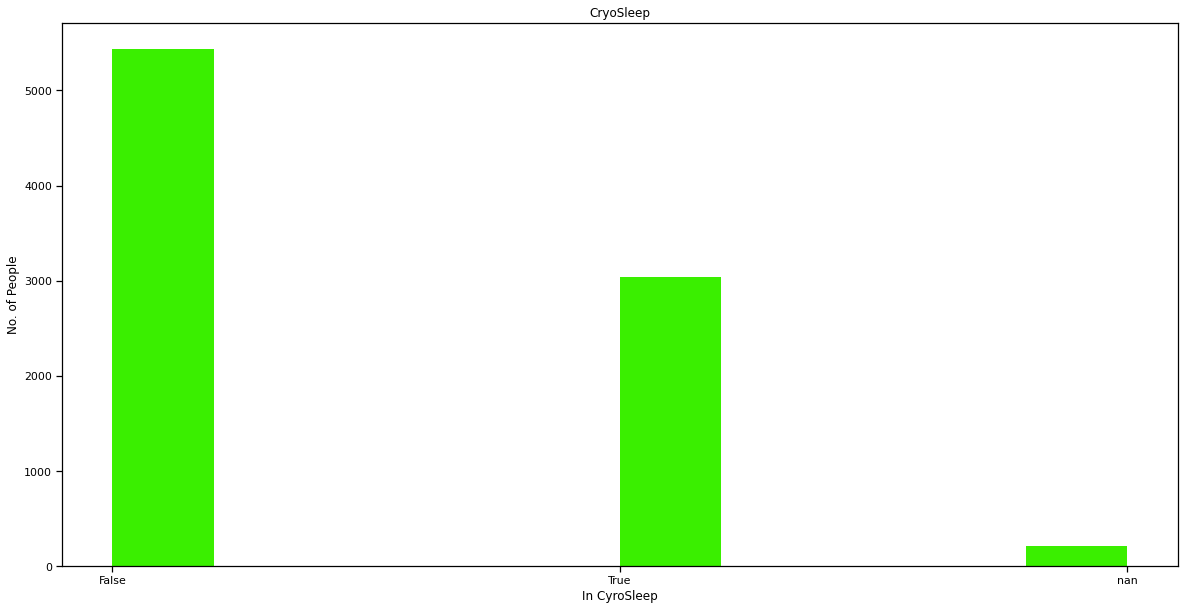

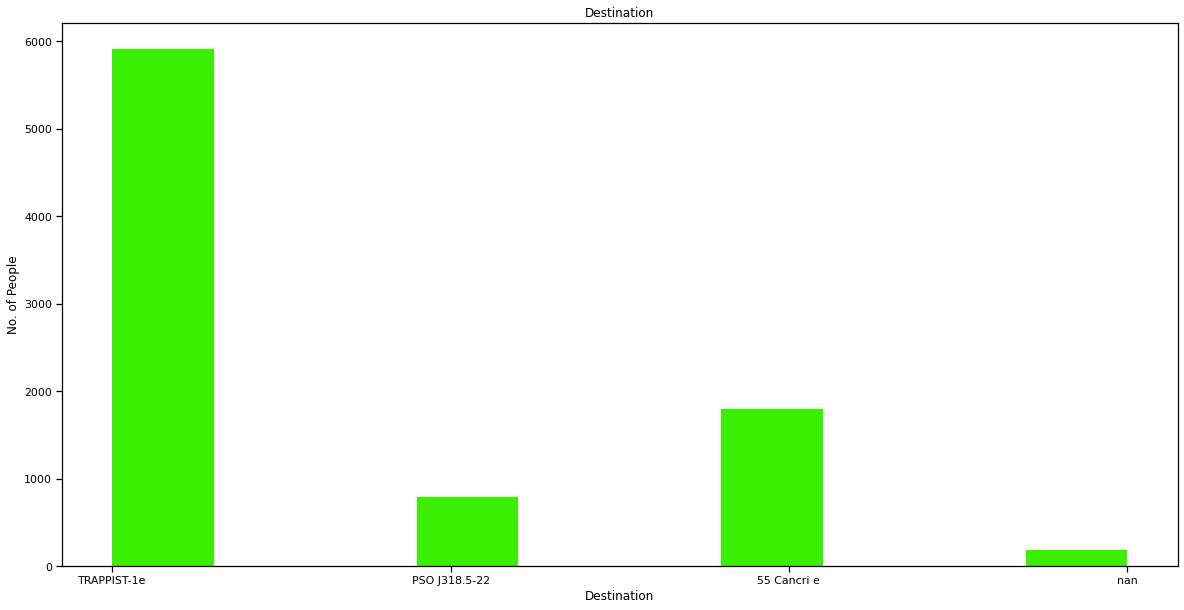

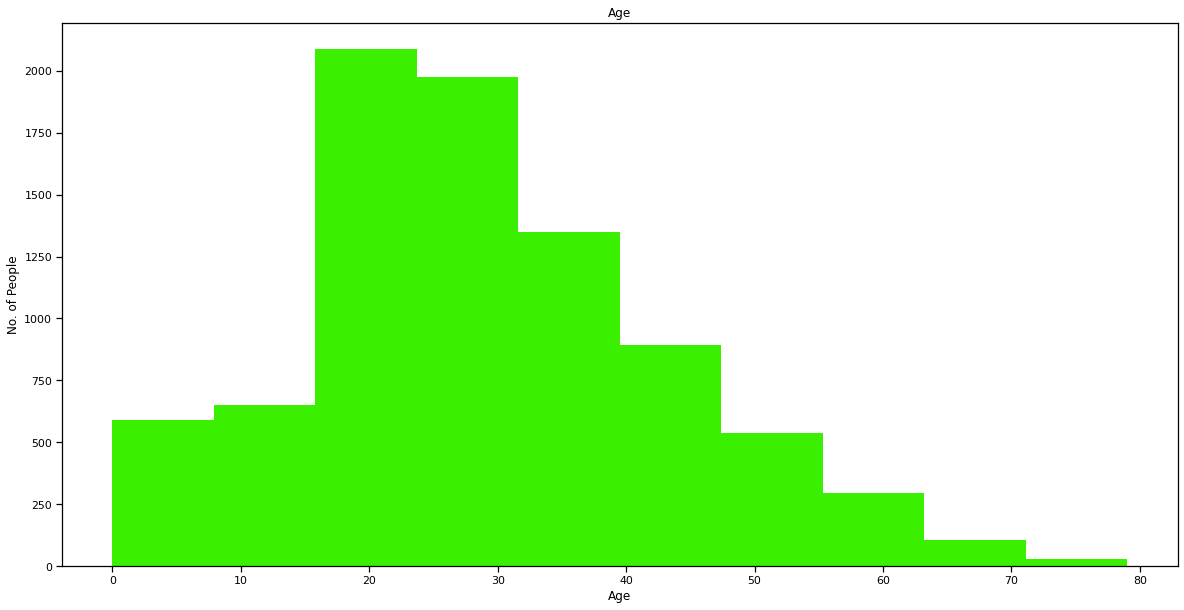

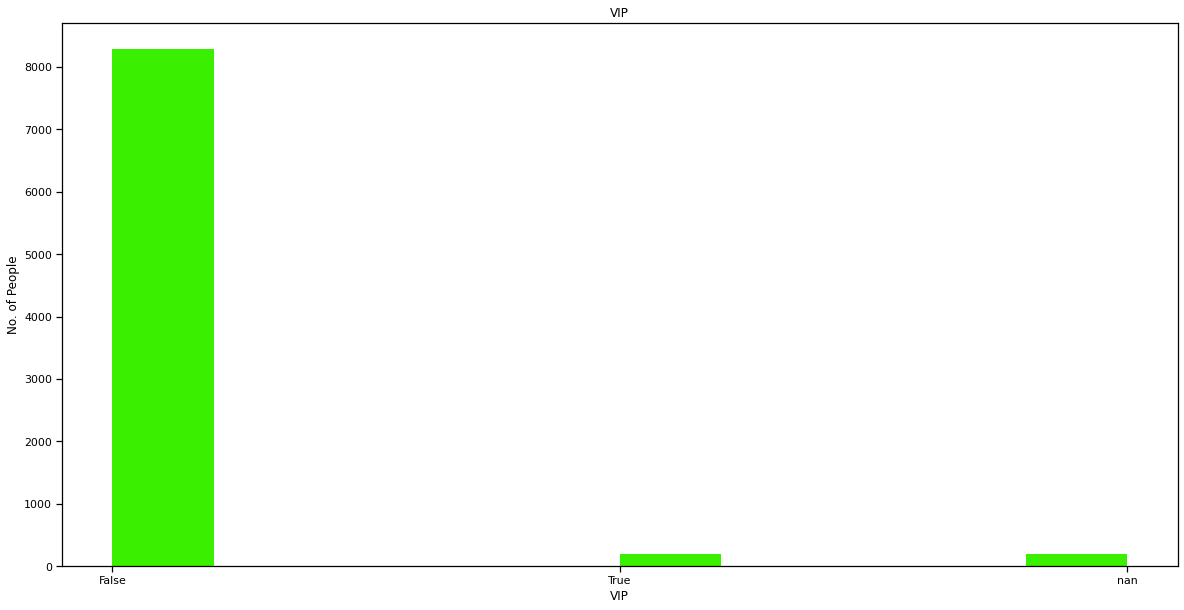

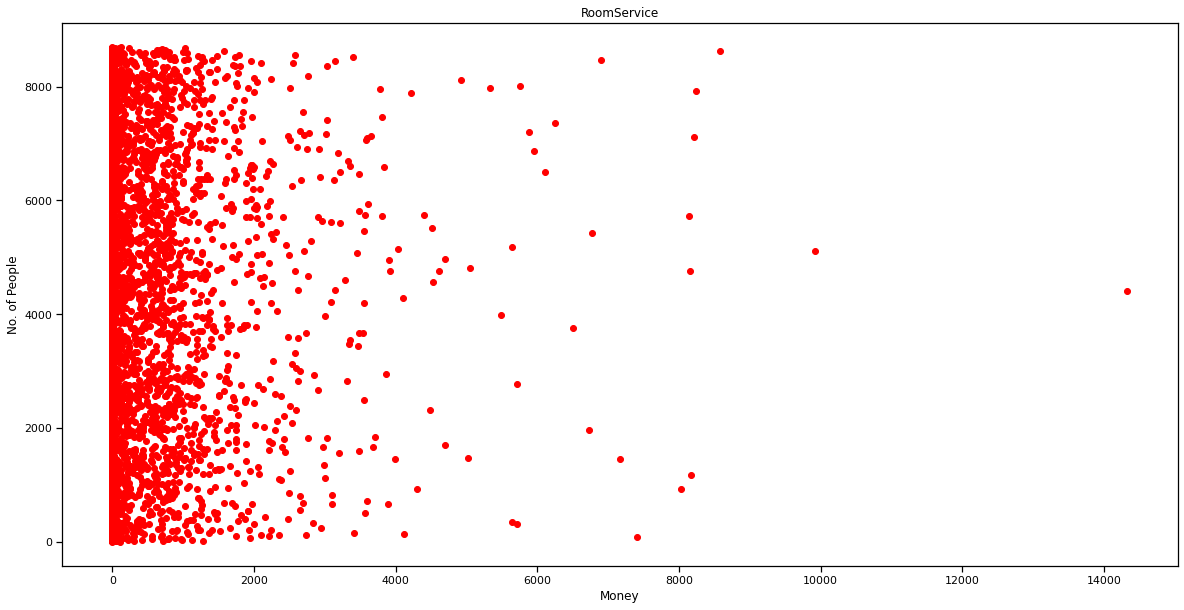

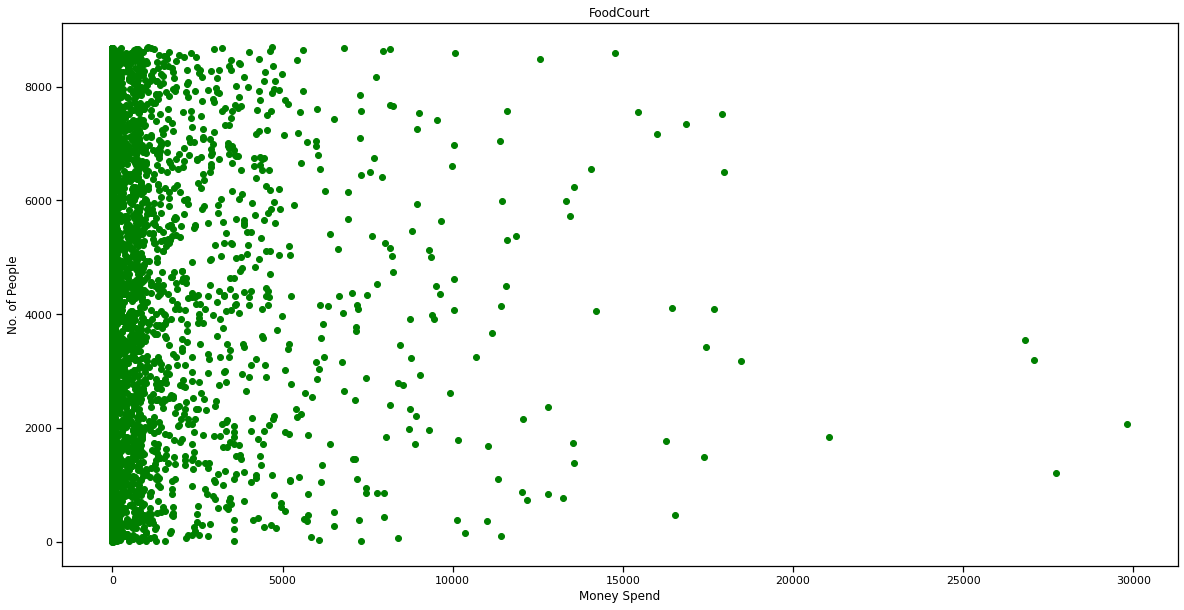

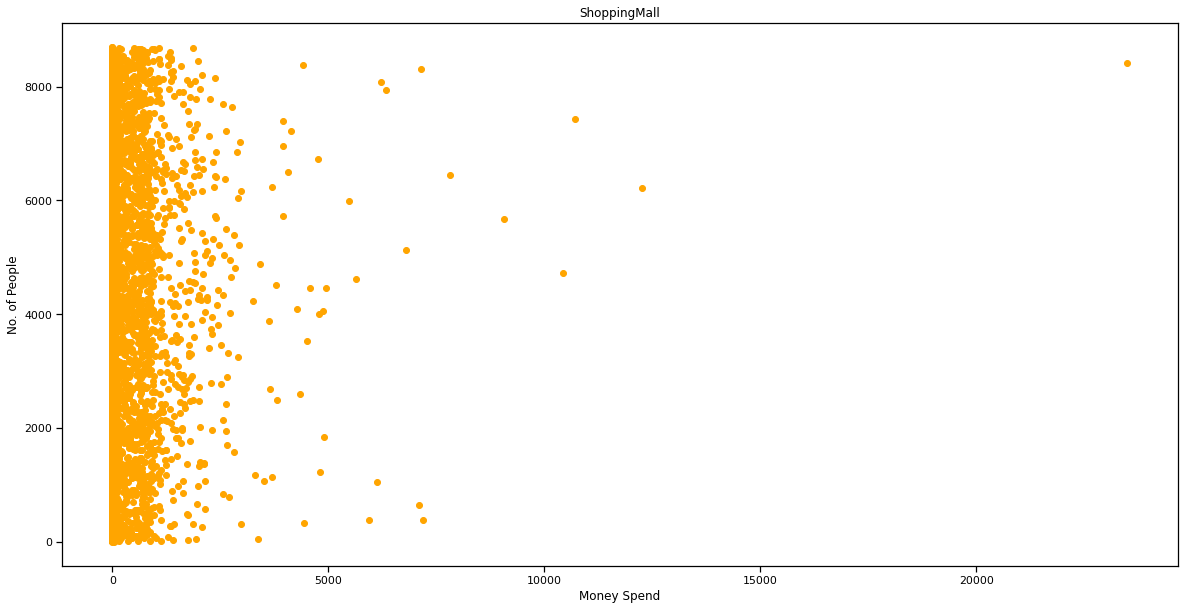

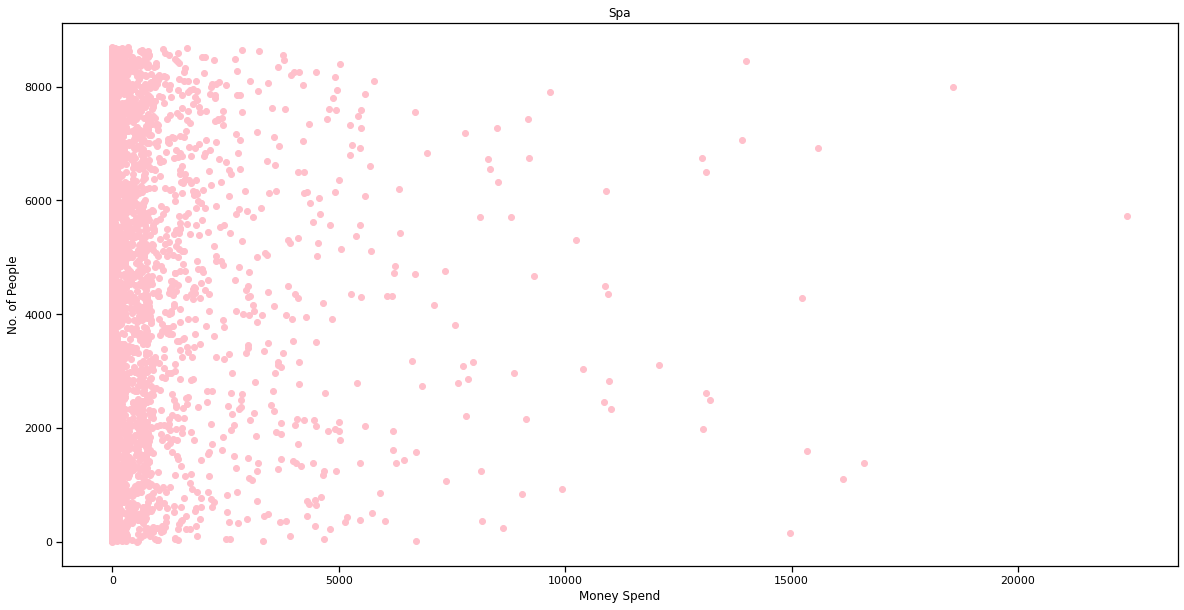

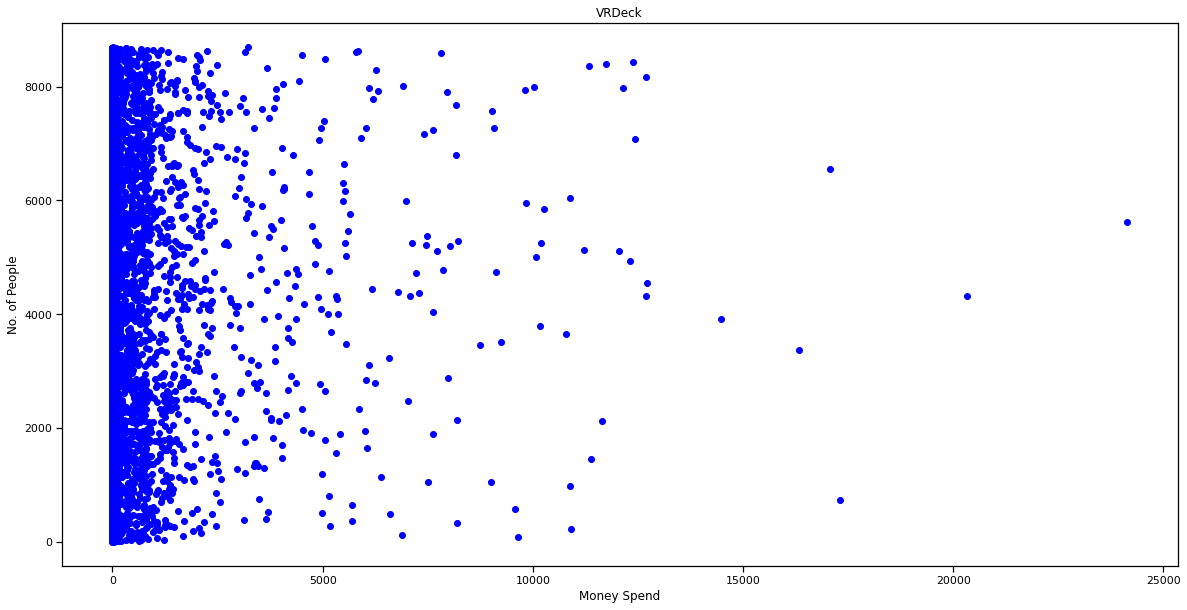

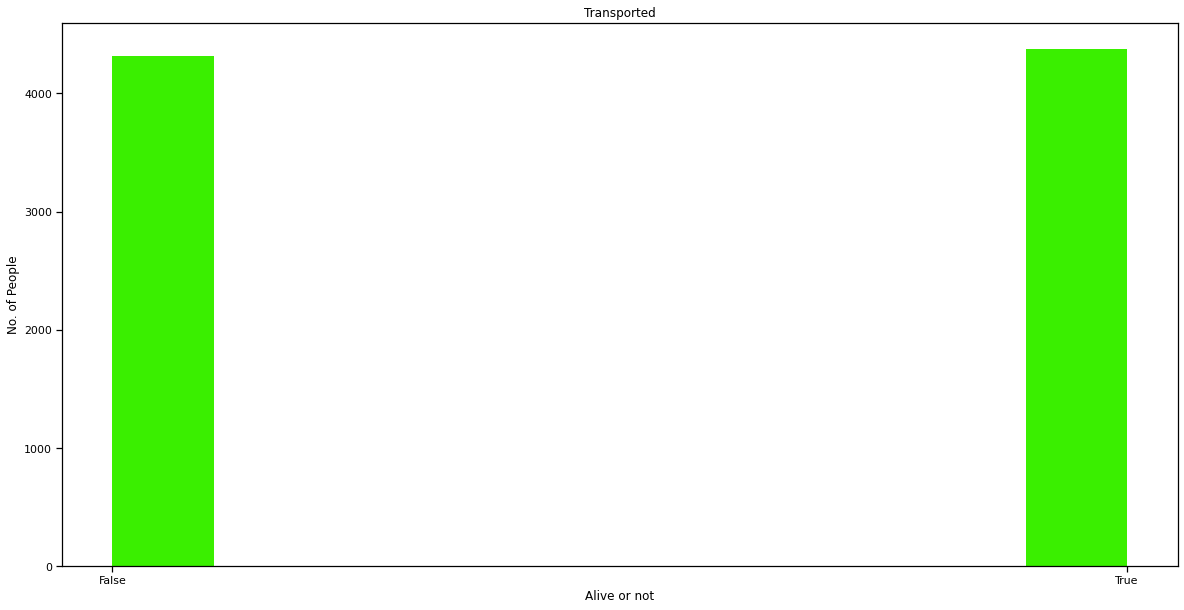

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(train_data["HomePlanet"].astype(str))
plt.title("HOME PLANET")
plt.xlabel("Planet Name")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.hist(train_data["CryoSleep"].astype(str))
plt.title("CryoSleep")
plt.xlabel("In CyroSleep")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.hist(train_data["Destination"].astype(str))
plt.title("Destination")
plt.xlabel("Destination")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.hist(train_data["Age"])
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.hist(train_data["VIP"].astype(str))
plt.title("VIP")
plt.xlabel("VIP")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=train_data["RoomService"],y=train_data.index,color="red")
plt.title("RoomService")
plt.xlabel("Money")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=train_data["FoodCourt"],y=train_data.index,color="green")
plt.title("FoodCourt")
plt.xlabel("Money Spend")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=train_data["ShoppingMall"],y=train_data.index,color="orange")
plt.title("ShoppingMall")
plt.xlabel("Money Spend")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=train_data["Spa"],y=train_data.index,color="pink")
plt.title("Spa")
plt.xlabel("Money Spend")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=train_data["VRDeck"],y=train_data.index,color="blue")
plt.title("VRDeck")
plt.xlabel("Money Spend")
plt.ylabel("No. of People")
plt.show()
plt.figure(figsize=(20,10))
plt.hist(train_data["Transported"].astype(str))
plt.title("Transported")
plt.xlabel("Alive or not")
plt.ylabel("No. of People")
plt.show()
#plt.figure(figsize=(20,10))
#plt.hist(train_data["Cabin_Deck"].astype(str))
#plt.title("Cabin_Deck")
#plt.xlabel("Cabin_Deck")
#plt.ylabel("No. of People")
#plt.show()
#plt.figure(figsize=(20,10))
#plt.hist(train_data["Cabin_Number"].astype(str))
#plt.title("Cabin_Number")
#plt.xlabel("Cabin_Number")
#plt.ylabel("No. of People")
#plt.show()
#plt.figure(figsize=(20,10))
#plt.hist(train_data["Cabin_Side"].astype(str))
#plt.title("Cabin_Side")
#plt.xlabel("Cabin_Side")
#plt.ylabel("No. of People")
#plt.show()


Model0 Pycret

In [ ]:
model_0_data=train_data.copy()


In [ ]:
model_0_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
preprocess(data=model_0_data)

In [ ]:
model_0_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


In [ ]:
model_0_test=test_data.copy()

In [ ]:
model_0_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
preprocess2(model_0_test)

In [ ]:
model_0_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN
4274,Mars,True,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,D,P
4275,Europa,False,Mising,29.0,True,0.0,2680.0,0.0,0.0,523.0,D,P


In [1]:
from pycaret.classification import *
model0 = setup(model_0_data, target ='Transported')

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8032,0.8881,0.8132,0.8006,0.8065,0.6064,0.6070,0.2380
gbc,Gradient Boosting Classifier,0.7973,0.8872,0.8296,0.7826,0.8050,0.5945,0.5962,0.3460
rf,Random Forest Classifier,0.7951,0.8643,0.7653,0.8181,0.7903,0.5904,0.5924,0.3990
lr,Logistic Regression,0.7942,0.8784,0.8084,0.7892,0.7985,0.5884,0.5890,0.9880
ada,Ada Boost Classifier,0.7898,0.8749,0.8129,0.7799,0.7958,0.5793,0.5803,0.2060
et,Extra Trees Classifier,0.7832,0.8416,0.7417,0.8130,0.7751,0.5667,0.5696,0.3150
knn,K Neighbors Classifier,0.7744,0.8417,0.7770,0.7764,0.7763,0.5488,0.5493,0.1720
ridge,Ridge Classifier,0.7722,0.0000,0.7164,0.8105,0.7602,0.5447,0.5489,0.0920
lda,Linear Discriminant Analysis,0.7722,0.8588,0.7164,0.8105,0.7602,0.5447,0.5489,0.1310
svm,SVM - Linear Kernel,0.7487,0.0000,0.7447,0.7570,0.7428,0.4975,0.5068,0.1060


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2247, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predictions = predict_model(best, data=model_0_test)
predictions

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mising,HomePlanet_Mars,CryoSleep,Destination_55 Cancri e,Destination_TRAPPIST-1e,Destination_PSO J318.5-22,Destination_Mising,Age,...,Cabin_Deck_G,Cabin_Deck_B,Cabin_Deck_E,Cabin_Deck_C,Cabin_Deck_A,Cabin_Deck_D,Cabin_Deck_T,Cabin_Side,prediction_label,prediction_score
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,27.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.7348
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.9942
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.9968
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.9948
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.6232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,34.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.7385
4273,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.6480
4274,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.9685
4275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.8555


In [ ]:
model_0_final = pd.DataFrame(test_data["PassengerId"])

In [ ]:
model_0_final

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [ ]:
model_0_final["Transported"]=predictions["prediction_label"]

In [ ]:
model_0_final

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [ ]:
model_0_final.loc[model_0_final["Transported"]==0,"Transported"]="False"

In [ ]:
model_0_final.loc[model_0_final["Transported"]==1,"Transported"]="True"

In [ ]:
model_0_final = model_0_final.set_index('PassengerId')

In [ ]:
model_0_final

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
model_0_final.to_csv('model_0_final_model_0.csv')

In [ ]:
!kaggle competitions submit spaceship-titanic -f model_0_final_model_0.csv -m "message"

100% 56.4k/56.4k [00:00<00:00, 271kB/s]
400 - Bad Request


Model 1 LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = make_pipeline(
                    LogisticRegression(verbose=1))

In [ ]:
model1

Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

In [ ]:
model1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

In [ ]:
preds1=model1.predict(X_test)

In [ ]:
preds1

array([False,  True,  True, ...,  True, False,  True])

In [ ]:
from sklearn.metrics import accuracy_score
model1_score=accuracy_score(y_true=y_test, y_pred=preds1)*100
model1_score

77.79565567176186

In [ ]:
model_1_final = pd.DataFrame(test_data["PassengerId"])
model_1_final


,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [ ]:
preds1=model1.predict(subbmision_test)

In [ ]:
preds1

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
model_1_final["Transported"]=preds1

In [ ]:
model_1_final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
model_1_final = model_1_final.set_index('PassengerId')

In [ ]:
model_1_final

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
model_1_final.to_csv('model_1_final.csv')


In [ ]:
!kaggle competitions submit spaceship-titanic -f model_1_final.csv -m "i am back bitchesss"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 561, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.8/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'model_1_final.csv.csv'


Model 2 GradientBoostingClassifier

In [ ]:
parameters = {
    "loss":['log_loss','deviance','exponential'],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_features":['auto','log2','sqrt'],
    "criterion": ['friedman_mse','squared_error'],
  
    "n_estimators":[100,200,300,400,500]
    }

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
rf = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = 5)
grid_search.fit(X_train,y_train)
 


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1050 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
grid_search.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
model2 = make_pipeline(StandardScaler(),
                    GradientBoostingClassifier(criterion='squared_error',learning_rate=0.05,loss='deviance',max_features='sqrt',n_estimators=200,verbose=1))

In [ ]:
model2

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='squared_error',
                                            init=None, learning_rate=0.05,
                                            loss='deviance', max_depth=3,
                                            max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=200,
                                            n_iter_no_change=None,
        

In [ ]:
model2.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3603            0.58s
         2           1.3377            0.64s
         3           1.3172            0.63s
         4           1.2991            0.61s
         5           1.2806            0.60s
         6           1.2620            0.58s
         7           1.2417            0.57s
         8           1.2249            0.57s
         9           1.2152            0.60s
        10           1.2034            0.61s
        20           1.0992            0.53s
        30           1.0384            0.48s
        40           0.9912            0.44s
        50           0.9608            0.40s
        60           0.9319            0.37s
        70           0.9107            0.35s
        80           0.8960            0.32s
        90           0.8804            0.29s
       100           0.8689            0.27s
       200           0.8005            0.00s


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='squared_error',
                                            init=None, learning_rate=0.05,
                                            loss='deviance', max_depth=3,
                                            max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=200,
                                            n_iter_no_change=None,
        

In [ ]:
preds2=model2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
model2_score=accuracy_score(y_true=y_test, y_pred=preds2)*100
model2_score

79.84714400643604

In [ ]:
model_2_final = pd.DataFrame(test_data["PassengerId"])
model_2_final




,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [ ]:
preds2=model2.predict(subbmision_test)

In [ ]:
model_2_final["Transported"]=preds2

In [ ]:

model_2_final = model_2_final.set_index('PassengerId')
model_2_final

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:

model_2_final.to_csv('model_2_final.csv')

In [ ]:
!kaggle competitions submit spaceship-titanic -f model_2_final.csv -m "i am back bitchesss"

100% 56.2k/56.2k [00:00<00:00, 248kB/s]
Successfully submitted to Spaceship Titanic

Model 3 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [100,150,200,250,300],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [ ]:
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5)

In [ ]:
grid_search.fit(X_train,y_train)


KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 250,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
model3 = make_pipeline(
                    RandomForestClassifier(max_depth=250,max_features='auto',n_estimators=300,criterion='entropy',verbose=1),
                    )



In [ ]:
model3

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=250, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=1, warm_start=False))],
         verbose=False)

In [ ]:
model3.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.1s finished


Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=250, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=1, warm_start=False))],
         verbose=False)

In [ ]:
preds3=model3.predict(X_test)
from sklearn.metrics import accuracy_score
model3_score=accuracy_score(y_true=y_test, y_pred=preds3)*100
model3_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


79.64601769911505

In [ ]:
subbmision_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,D,P
4275,9273_01,Europa,False,D/297/P,Mising,29.0,True,0.0,2680.0,0.0,0.0,523.0,D,P


In [ ]:
model_3_final = pd.DataFrame(test_data["PassengerId"])
model_3_final
preds3=model3.predict(subbmision_test)

model_3_final["Transported"]=preds3

model_3_final = model_3_final.set_index('PassengerId')
model_3_final

model_3_final.to_csv('model_3_final.csv')
!kaggle competitions submit spaceship-titanic -f model_3_final.csv -m "i am back bitchesss"

NameError: ignored

[Text(0.7942384794743473, 0.9974619289340102, 'X[3645] <= 38.945\ngini = 0.5\nsamples = 3819\nvalue = [2980, 3090]'),
 Text(0.791998681056205, 0.9923857868020305, 'X[65] <= 38.945\ngini = 0.5\nsamples = 3818\nvalue = [2976, 3090]'),
 Text(0.7897588826380626, 0.9873096446700508, 'X[3412] <= 27.532\ngini = 0.5\nsamples = 3817\nvalue = [2972, 3090]'),
 Text(0.7875190842199202, 0.9822335025380711, 'X[2803] <= 27.532\ngini = 0.5\nsamples = 3815\nvalue = [2967, 3090]'),
 Text(0.7852792858017779, 0.9771573604060914, 'X[1405] <= 38.945\ngini = 0.5\nsamples = 3813\nvalue = [2963, 3090]'),
 Text(0.7830394873836355, 0.9720812182741116, 'X[4] <= -0.275\ngini = 0.5\nsamples = 3812\nvalue = [2958, 3090]'),
 Text(0.6707020586897179, 0.9670050761421319, 'X[6324] <= 3.361\ngini = 0.462\nsamples = 2449\nvalue = [1422, 2495]'),
 Text(0.6302681196192342, 0.9619289340101523, 'X[6333] <= 1.296\ngini = 0.464\nsamples = 2400\nvalue = [1403, 2439]'),
 Text(0.5717982256596906, 0.9568527918781726, 'X[1304] <= 38

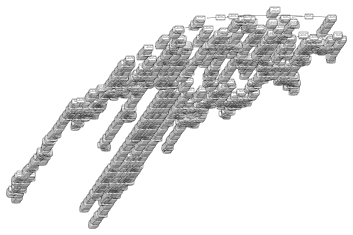

In [ ]:
#from sklearn.tree import plot_tree
#plot_tree(model3.steps[1][1].estimators_[0], filled=False)

Model 4 SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model4 = make_pipeline(StandardScaler(),
                    SGDClassifier(verbose=1))
model4
model4.fit(X_train,y_train)
preds4=model4.predict(X_test)
from sklearn.metrics import accuracy_score
model4_score=accuracy_score(y_true=y_test, y_pred=preds4)*100
model4_score

-- Epoch 1
Norm: 53.64, NNZs: 28, Bias: -0.905108, T: 5665, Avg. loss: 12.312059
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 28.15, NNZs: 28, Bias: -6.602119, T: 11330, Avg. loss: 4.119082
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.73, NNZs: 28, Bias: -2.331736, T: 16995, Avg. loss: 2.722353
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 16.83, NNZs: 28, Bias: -2.523527, T: 22660, Avg. loss: 2.121958
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 14.95, NNZs: 28, Bias: -1.895183, T: 28325, Avg. loss: 1.766578
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 11.58, NNZs: 28, Bias: -1.787059, T: 33990, Avg. loss: 1.544102
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 11.24, NNZs: 28, Bias: -0.913723, T: 39655, Avg. loss: 1.385490
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 9.68, NNZs: 28, Bias: -0.908713, T: 45320, Avg. loss: 1.237951
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 9.10, NNZs: 28, Bias: -1.089869, T: 50985, Avg. loss: 1.

77.93330588719638

Model 6 XGBClassifier

In [ ]:
from xgboost  import XGBClassifier
model6 = make_pipeline(
                    XGBClassifier())
model6
model6.fit(X_train,y_train)
preds6=model6.predict(X_test)
from sklearn.metrics import accuracy_score
model6_score=accuracy_score(y_true=y_test, y_pred=preds6)*100
model6_score

80.8974886784685

In [ ]:
model_6_final = pd.DataFrame(test_data["PassengerId"])
model_6_final



model_6_final = model_6_final.set_index('PassengerId')
model_6_final
model_6_final.to_csv('model_6_final.csv')
!kaggle competitions submit spaceship-titanic -f model_6_final.csv -m "i am back bitchesss"

Model 6 Dense Neural Network

In [ ]:
X_train.shape

(6627, 29)

In [ ]:
shape=X_train.shape[1]


29

In [ ]:
input_layer=tf.keras.layers.Input(shape=(shape))
normalization_layer1=tf.keras.layers.BatchNormalization(input_shape=[shape])(input_layer)
hdl1=tf.keras.layers.Dense(364,activation="relu")(normalization_layer1)
normalization_layer1=tf.keras.layers.BatchNormalization()(hdl1)
dropout_layer1=tf.keras.layers.Dropout(0.5)(normalization_layer1)

hdl2=tf.keras.layers.Dense(364,activation="relu")(dropout_layer1)
normalization_layer2=tf.keras.layers.BatchNormalization()(hdl2)
dropout_layer2=tf.keras.layers.Dropout(0.5)(normalization_layer2)

hdl3=tf.keras.layers.Dense(364,activation="relu")(dropout_layer2)
normalization_layer3=tf.keras.layers.BatchNormalization()(hdl3)
dropout_layer3=tf.keras.layers.Dropout(0.2)(normalization_layer3)

hdl4=tf.keras.layers.Dense(10,activation="relu")(dropout_layer3)
output_layer=tf.keras.layers.Dense(1,activation="sigmoid")(hdl4)
#output_layer=tf.keras.layers.Dense(1,activation="sigmoid")(hdl1)
model6=tf.keras.Model(inputs=input_layer,outputs=output_layer,name="modified_dense")

In [ ]:
model6.summary()

Model: "modified_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 29)]              0         
                                                                 
 batch_normalization_44 (Bat  (None, 29)               116       
 chNormalization)                                                
                                                                 
 dense_65 (Dense)            (None, 364)               10920     
                                                                 
 batch_normalization_45 (Bat  (None, 364)              1456      
 chNormalization)                                                
                                                                 
 dropout_36 (Dropout)        (None, 364)               0         
                                                                 
 dense_66 (Dense)            (None, 364)            

In [ ]:
model6

In [ ]:
Early_Stoping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)

In [ ]:
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.02),metrics=["accuracy"])

In [ ]:
history=model6.fit(training_data,epochs=200,validation_data=testing_data,callbacks=[Early_Stoping])

Epoch 1/200
17/17 [==============================] - 2s 20ms/step - loss: 0.6243 - accuracy: 0.7002 - val_loss: 1.2429 - val_accuracy: 0.7701
Epoch 2/200
17/17 [==============================] - 0s 8ms/step - loss: 0.4529 - accuracy: 0.7871 - val_loss: 0.7013 - val_accuracy: 0.7876
Epoch 3/200
17/17 [==============================] - 0s 8ms/step - loss: 0.4290 - accuracy: 0.7907 - val_loss: 0.6459 - val_accuracy: 0.7858
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 0.4167 - accuracy: 0.7967 - val_loss: 0.5331 - val_accuracy: 0.7852
Epoch 5/200
17/17 [==============================] - 0s 8ms/step - loss: 0.4123 - accuracy: 0.8059 - val_loss: 0.4938 - val_accuracy: 0.7827
Epoch 6/200
17/17 [==============================] - 0s 8ms/step - loss: 0.4037 - accuracy: 0.8075 - val_loss: 0.4851 - val_accuracy: 0.7912
Epoch 7/200
17/17 [==============================] - 0s 8ms/step - loss: 0.4028 - accuracy: 0.8091 - val_loss: 0.4847 - val_accuracy: 0.7791
Epoch 8/200


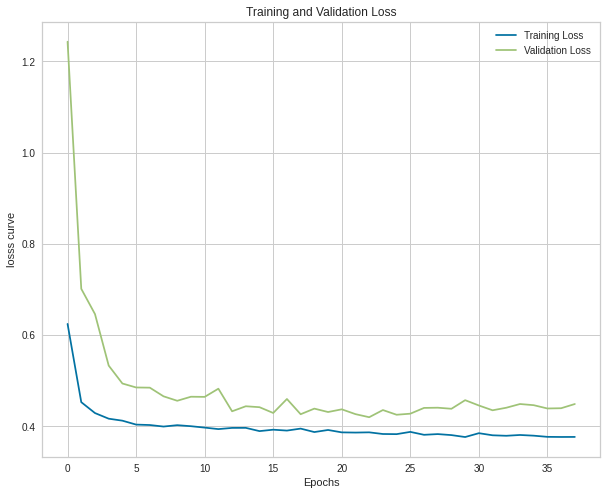

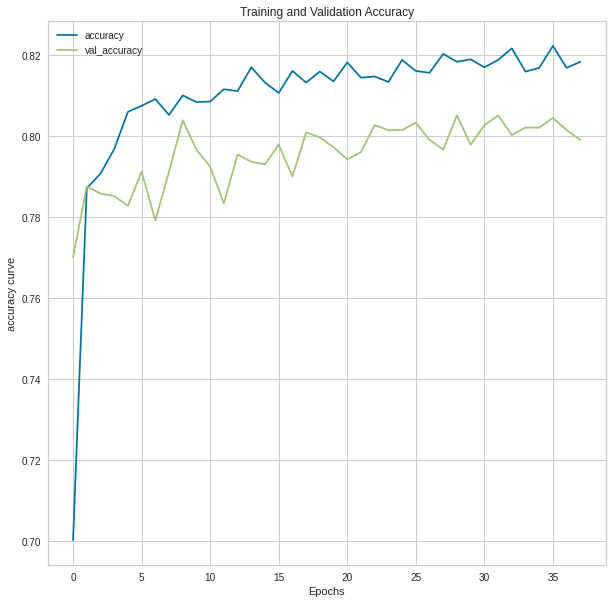

In [ ]:
loss(history)

In [ ]:
model6.evaluate(testing_data)

5/5 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8027


[0.41990506649017334, 0.8026553988456726]

In [ ]:
y_pred=model6.predict(subbmision_test)

134/134 [==============================] - 0s 2ms/step


In [ ]:
X_test = subbmision_test

y_pred = (model6.predict(subbmision_test) > 0.5).astype("bool")

display(y_pred)

results = pd.DataFrame(test_data['PassengerId'])

results.insert(1, 'Transported', y_pred, True)

results.to_csv('dense_model.csv', index=False)

134/134 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
!kaggle competitions submit spaceship-titanic -f dense_model.csv -m "i am back bitchesss"

100% 56.4k/56.4k [00:00<00:00, 308kB/s]
Successfully submitted to Spaceship Titanic